# Python Solutions to Tutorial 04

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat 

df = pd.read_csv('Tutorial04_data.csv')

## 1.	A high-voltage power supply should have a nominal output voltage of 350 V. A sample of four units is selected each day and tested for process-control purposes.  Set up X-bar and R charts on this process. Is the process in statistical control?

In [2]:
m = 20
n = 1
x_bar_accum = 0
R_accum = 0
x_bar_samples = []
R_samples = []

while n <= m:
    x_bar = df.loc[df['Sample Number']==n,'Voltage'].mean()
    x_bar_samples.append(x_bar)
    R = df.loc[df['Sample Number']==n,'Voltage'].max()-df.loc[df['Sample Number']==n,'Voltage'].min()
    R_samples.append(R)
    x_bar_accum = x_bar_accum+x_bar
    R_accum = R_accum+R
    n += 1
CL_x_bar = x_bar_accum/m
CL_R = R_accum/m

print(CL_x_bar, CL_R)

UCL_x_bar = CL_x_bar + 0.729 * CL_R # A2
LCL_x_bar = CL_x_bar - 0.729 * CL_R # A2
UCL_R = 2.282*CL_R # D4
LCL_R = 0 # D3
print(UCL_x_bar, LCL_x_bar,UCL_R, LCL_R)

351.0325 0.6250000000000057
351.488125 350.57687500000003 1.426250000000013 0


In [3]:
n = 1
while n<= m:
    if(R_samples[n-1] >= UCL_R):
        print('process out of control')
    n += 1

In [4]:
n = 1
while n<= m:
    if(x_bar_samples[n-1]>=UCL_x_bar or x_bar_samples[n-1]<=LCL_x_bar):
        print('process out of control')
    n += 1

Therefore the process is in control

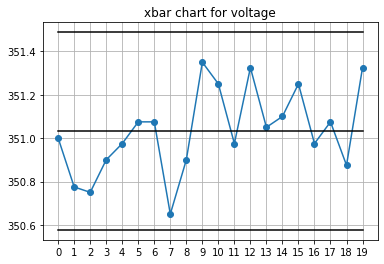

In [5]:
# example of plot
ucl_line = np.full(m,UCL_x_bar)
lcl_line = np.full(m,LCL_x_bar)
cl_line = np.full(m,CL_x_bar)
x = list(range(0,m))
plt.plot(x_bar_samples,marker="o")
plt.plot(ucl_line,color='k')
plt.plot(lcl_line,color='k')
plt.plot(cl_line,color='k')
plt.xticks(x)
plt.grid(True)
plt.title('xbar chart for voltage')
plt.show()
# note the indexing in Python starts from 0, so 0 means sample 1, etc

## 2.	What is the estimate of the standard deviation?

In [6]:
sigma = CL_R/2.059 #R_bar/d2
print(sigma)

0.30354541039339755


## 3.	Is there evidence to support the claim that voltage is normally distributed?

In [7]:
result=stat.anderson(df.Voltage,'norm') #store results to improve output readability
print('Statistic: %.3f' % result.statistic)
print('Critical Values:',result.critical_values)
print('Significance_level', result.significance_level)

Statistic: 0.704
Critical Values: [0.551 0.627 0.752 0.878 1.044]
Significance_level [15.  10.   5.   2.5  1. ]


0.704 is smaller than 0.752, therefore, p-value exceeds 5% and we FTR normality

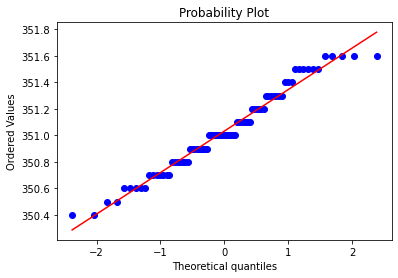

In [8]:
stat.probplot(df.Voltage,plot=plt)
plt.show()

## 4.	Supposing the process was out-of-control, and after deleting the points lying out of the bounds in the R chart, the new (in-control) R-bar is 0.56. What would be the new values for the UCL and LCL in the R chart?

In [9]:
UCL_R = 2.282*0.56
LCL_R = 0
print(UCL_R, LCL_R)

1.2779200000000002 0


## 5.	Supposing the process was out-of-control, and after deleting the points lying out of the bounds in the R chart, the new (in-control) R-bar is 0.56. What would be the new values for the CL, UCL and LCL in the X-bar chart?

In [10]:
UCL_x_bar = CL_x_bar+0.729*0.56
LCL_x_bar = CL_x_bar-0.729*0.56
print(UCL_x_bar, LCL_x_bar)

351.44074 350.62426000000005


## 6.	Assume that the process mean shifts to a value that is 1.5 times the value of sigma. What is the probability that we will still assume that the previous value of mean is the correct one?

$\beta=Pr(-3-k\sqrt{n}\leq z \leq 3-k\sqrt{n})$

In [11]:
#k=1.5, n=4
beta = stat.norm.cdf(3-1.5*2,0,1)-stat.norm.cdf(-3-1.5*2)
print(beta)

0.49999999901341236


rounded to 0.50

## 7.	What is the Average Run Length (ARL) for this process?

In [12]:
ARL1 = 1/(1-beta)
print(ARL1)

1.9999999960536492


rounded to 2

## 8.	What should be the minimum sample size if we desire to detect this shift with a probability of at least 0.9?

In [13]:
# beta = 1-power, power>90% ==> beta<10%
n = 4
k = 1.5
beta = 0.5
while beta > 0.1:
    beta = stat.norm.cdf(3-k*np.sqrt(n),0,1)-stat.norm.cdf(-3-k*np.sqrt(n),0,1)
    print(n,beta)
    n += 1

4 0.49999999901341236
5 0.3616312341865811
6 0.25008108321358524
7 0.16636567182417109
8 0.10700013483098877
9 0.06680720126882617


the answer is 9

## 9.	Supposing that the 4 units are collected every hour, what is the ARL if we switch the sample size to the integer value defined in the previous question?

In [14]:
# takes beta from 8 
ARL = 1/(1-beta)
print(ARL)

1.0715899237110074


## 10.	What is the ATS if we switch the sample size to the same integer value defined in the previous question?

Because we have 1 sample per 15 minutes (4/1hr), 9 samples takes 2.25 hours.

In [15]:
ATS = 2.25*ARL
print(ATS)

2.4110773283497666


## 11. What should be the minimum sample size if we wish to increase the time to signal to at least 2.8h?

$
\begin{align*}
ATS&=0.25(n)ARL\\
&=\frac{0.25n}{1-\beta}\\
&=\frac{0.25n}{1-Pr(-3-1.5\sqrt{n}\leq z \leq 3-1.5\sqrt{n})}\\
\end{align*}
$

In [16]:
n=2
while n<30:    
    den=1-(stat.norm.cdf(3-1.5*np.sqrt(n)-stat.norm.cdf(-3-1.5*np.sqrt(n))))
    ATS=0.25*n/den
    print(n, ATS)
    n += 1
print(n,den, ATS)                 


2 2.63452494027031
3 2.18105640514892
4 1.9999999984256336
5 1.958115852575555
6 2.000216245303987
7 2.0992417668690506
8 2.2396419954910938
9 2.411077328349838
10 2.6058779818751394
11 2.818020356386346
12 3.042721383509996
13 3.2762523206281924
14 3.5158011269933445
15 3.7593273365968285
16 4.0054068908778735
17 4.2530818884559665
18 4.5017293931673334
19 4.750956458728606
20 5.000521890781865
21 5.250281214012829
22 5.500149762071591
23 5.7500788863833
24 6.000041127596574
25 6.250021235529181
26 6.500010865099219
27 6.7500055114452655
28 7.000002773060856
29 7.2500013845196705
30 0.9999998090318061 7.2500013845196705


the answer is 11